In [1]:
import os
import re
import openai
import time
import json
import timeout_decorator
from langchain.text_splitter import RecursiveCharacterTextSplitter
import secret
import datetime

In [2]:
cwd = os.getcwd()
pwd = os.path.join(os.path.dirname(cwd), os.path.join('data','10-Ks'))

root_directory = pwd
target_file = 'Management.txt'
model = "gpt-4-1106-preview"
task = 'ABBR'

gpt_result_file = 'Management_' + str(model) + '_' +str(task) + '_results.json'
#gpt_cleaned_result_file = 'Management_' + str(model) + '_' +str(task) + '_results_cleaned.json'

print(root_directory)
for root, directories, files in os.walk(root_directory):
    for directory in directories:
        print(directory)
        folder_path = os.path.join(root, directory)
        print(folder_path)
        files = os.listdir(folder_path)
        print(files)
        if target_file in files:
            file_pth = os.path.join(folder_path, gpt_result_file)
            print(file_pth)
            with open(os.path.join(folder_path, target_file), 'r', encoding = 'utf-8') as rf:
                input_ = rf.read()
                input_ = input_.replace("\n","")
            result_file_  = open(file_pth)
            run_evaluations(input_, json.load(result_file_))
            break
    break
            

/Users/tanmayiballa/Desktop/LLM-KG-1204/l715_23-1/data/10-Ks
Bristol-Myers_Squibb_Company
/Users/tanmayiballa/Desktop/LLM-KG-1204/l715_23-1/data/10-Ks/Bristol-Myers_Squibb_Company
['2014', '2022', '2023', '2015', '2017', '2019', '2021', '2020', '2018', '2016']
Aerojet_Rocketdyne_Holdings_Inc.
/Users/tanmayiballa/Desktop/LLM-KG-1204/l715_23-1/data/10-Ks/Aerojet_Rocketdyne_Holdings_Inc.
['2013', '2022', '2023', '2015', '2017', '2019', '2021', '2020', '2018', '2016']
Rocket_Lab_USA_Inc
/Users/tanmayiballa/Desktop/LLM-KG-1204/l715_23-1/data/10-Ks/Rocket_Lab_USA_Inc
['2022', 'README.md']


In [3]:
dir = '/Users/tanmayiballa/Desktop/LLM-KG-1204/l715_23-1/data/10-Ks/Bristol-Myers_Squibb_Company'
sub_folders = os.listdir(dir)
sub_folders

['2014',
 '2022',
 '2023',
 '2015',
 '2017',
 '2019',
 '2021',
 '2020',
 '2018',
 '2016']

In [456]:
sub_folders = sub_folders[0]

In [4]:
sub_folders[0]

'2014'

In [5]:
def validate_abbr(key, val):
    #print(key, val)
    char_rem = "{}''""[]#():-,._&*[0-9]"
    pattern = "[" + re.escape(char_rem) + "]"
    key = re.sub(pattern, '', key)
    val = re.sub(pattern, '', val)
    key = key.lower()
    val = val.lower()
    words_val = val.split(' ')
    if len(words_val)<len(key):
        return False
    words_val = [word[0] for word in words_val if len(word)>0]
    #print(key, val, words_val)
    if(len(words_val) < len(key)):
        return False
    if ''.join(words_val) == key:
        return True
    for i in range(1,len(key)):
        try:
            prev_val = key[i-1]
            curr_val = key[i]
            if(prev_val in words_val[:i]):
                flag = True
            if flag == False:
                #print(key, val, i, prev_val, curr_val)
                return False
            continue
        except:
            return False
    return True        
        


In [6]:
TP_rate = []
TG_rate = []

def run_evaluations(x, res):
    if res == None or len(res)==0:
        return 
    TP = []
    TG = []
    total = 0
    keys_all = []
    for dict in res:
        key = dict['ABBR']
        val = dict['DEF']
        if key in keys_all:
            continue
        keys_all.append(key)
        ## Exact match accuracy:
        if key!=None and val!=None:
            if len(key)<=len(val) and len(key)>1 and val.find(key)==-1 and x.find(key)!=-1 and x.find(val)!=-1:
                if len(val.split(' '))>=len(key)+2:
                    continue
                if key in TP:
                    continue
                if(validate_abbr(key,val)):
                    TP.append(key)
        ## Power of LLMs:
        if key!=None and val!=None:
            if len(key)<=len(val) and len(key)>1 and val.find(key)==-1:
                if key in TG:
                    continue
                if(validate_abbr(key,val)):
                    TG.append(key)
    print(keys_all)
    print(TG)
    print(TP)
    TG_rate.append(len(TG)/len(keys_all))
    TP_rate.append(len(TP)/len(keys_all))
    print(TP_rate)
    print(TG_rate)

In [415]:
for folder in sub_folders:
    print(folder)

2013
2022
2023
2015
2017
2019
2021
2020
2018
2016


In [7]:
path = 'Management_gpt-4-1106-preview_ABBR_results.json'
path = 'Management_GPT_3.5_ABR_results.json'
TP_rate_all = []
TG_rate_all = []


In [8]:
for folder in sub_folders:
    path = os.path.join(dir, folder)
    print(path)
    input_file = os.path.join(path, 'Management.txt')
    res_file = os.path.join(path, 'Management_GPT_3.5_ABR_results.json')
    with open(input_file, 'r', encoding = 'utf-8') as rf:
        input_ = rf.read()
        input_ = input_.replace("\n","")
    result_file_  = open(res_file)
    run_evaluations(input_, json.load(result_file_))
TP_rate_all.append(TP_rate)
TG_rate_all.append(TG_rate)

/Users/tanmayiballa/Desktop/LLM-KG-1204/l715_23-1/data/10-Ks/Bristol-Myers_Squibb_Company/2014
['BMS', 'Abilify', 'Onglyza', 'Forxiga', 'Bydureon', 'Byetta', 'Symlin', 'Farxiga', 'UK', 'MCOs', 'FDA', 'EMA', 'MAA', 'HCV', 'NDA', 'PMDA', 'HIV', 'PD-1', 'T', 'NKT cells', 'NSCLC', 'ASCO', 'HOS', 'Yervoy', 'DASISION', 'AML', 'EHA', 'ORR', 'OS', 'PFS', 'QOL', 'BLA', 'PDUFA', 'EU', 'LD', 'EMDAC', 'SGLT2', 'EASD', 'NVAF', ' VTE', ' DVT', ' PE', ' PDUFA', ' ESC', ' ARISTOTLE', ' HIV', ' FDA', ' AMPLIFY', ' EMA', 'U.S.', '2013', '2012', 'Sanofi', 'Plavix', 'Avapro', 'Avalide', '2015', '2016', 'AstraZeneca', 'metreleptin', 'Atripla', '2011', 'Amylin']
['UK', 'EMA', 'MAA', 'NDA', 'PMDA', 'HIV', 'PD-1', 'ASCO', 'HOS', 'DASISION', 'AML', 'EHA', 'ORR', 'OS', 'QOL', 'BLA', 'PDUFA', 'EU', 'U.S.']
['UK', 'EMA', 'MAA', 'NDA', 'HIV', 'PD-1', 'OS', 'BLA', 'PDUFA', 'U.S.']
[0.15873015873015872]
[0.30158730158730157]
/Users/tanmayiballa/Desktop/LLM-KG-1204/l715_23-1/data/10-Ks/Bristol-Myers_Squibb_Company/20

In [9]:
## TP rate:

import numpy as np
np.mean(np.array(TP_rate))

0.09083269345034051

In [488]:
np.mean(np.array(TG_rate))

0.6482809827036113

In [508]:
TP_rate

[0.4888888888888889,
 0.06557377049180328,
 0.19402985074626866,
 0.41818181818181815,
 0.08,
 0.0847457627118644,
 0.1643835616438356,
 0.1794871794871795,
 0.08108108108108109,
 0.34328358208955223]

In [267]:
len(TG)

48

In [496]:
len(TP_rate_all)

10

In [511]:
TP_rate_all[0], TG_rate_all[0]

([0.1,
  0.2631578947368421,
  0.2222222222222222,
  0.1111111111111111,
  0.15625,
  0.14285714285714285,
  0.14814814814814814,
  0.08695652173913043,
  0.16,
  0.14634146341463414],
 [0.7333333333333333,
  0.7368421052631579,
  0.7222222222222222,
  0.8333333333333334,
  0.78125,
  0.8095238095238095,
  0.6296296296296297,
  0.782608695652174,
  0.72,
  0.7073170731707317])

In [10]:
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
years = list(range(2013, 2023))
company1_means = TP_rate_all[0]
company2_means = TP_rate_all[1]
company1_years= [2013,2015,2016,2017,2018,2019,2020,2021,2022,2023]
company2_years = [2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]

# Plotting the trend
plt.plot(company1_years, company1_means, label='Aerojet_Rocketdyne_Holdings_Inc.', marker='o')
plt.plot(company2_years, company2_means, label='Bristol-Myers_Squibb_Company', marker='o')

# Adding labels and title
plt.xlabel('Years')
plt.ylabel('True Positive Mean')
plt.legend()

# Display the plot
plt.show()


IndexError: list index out of range

In [520]:
TG_rate_all[0]

[0.7333333333333333,
 0.7368421052631579,
 0.7222222222222222,
 0.8333333333333334,
 0.78125,
 0.8095238095238095,
 0.6296296296296297,
 0.782608695652174,
 0.72,
 0.7073170731707317]

In [522]:
TG_rate_all[2]

[0.6666666666666666,
 0.639344262295082,
 0.7164179104477612,
 0.6181818181818182,
 0.74,
 0.6271186440677966,
 0.6986301369863014,
 0.6282051282051282,
 0.581081081081081,
 0.5671641791044776,
 0.30158730158730157,
 0.46153846153846156,
 0.6666666666666666,
 0.26136363636363635,
 0.5294117647058824,
 0.2857142857142857,
 0.41025641025641024,
 0.5,
 0.42,
 0.3392857142857143]

In [11]:
!pwd

/Users/tanmayiballa/Desktop/LLM-KG-1204/l715_23-1/code


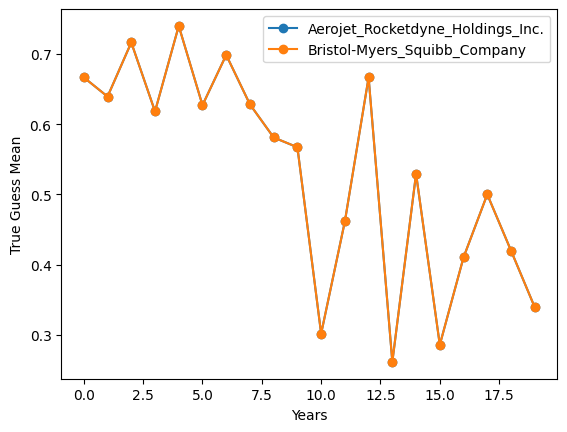

In [523]:
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
years = list(range(2013, 2023))
company1_means = TG_rate_all[0]
company2_means = TG_rate_all[1]
#company1_years= [2013,2015,2016,2017,2018,2019,2020,2021,2022,2023]
#company2_years = [2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]

# Plotting the trend
plt.plot(company1_means, label='Aerojet_Rocketdyne_Holdings_Inc.', marker='o')
plt.plot(company2_means, label='Bristol-Myers_Squibb_Company', marker='o')

# Adding labels and title
plt.xlabel('Years')
plt.ylabel('True Guess Mean')
plt.legend()

# Display the plot
plt.show()
